# Sammenligning av teoretiske beregninger og praktiske målinger via rulling på bane

#### *M. K. Booth, L. Engø-Monsen, S. L. Kildahl, K. Skrede* ####

## Sammendrag ##

*Sammendrag*



## Introduksjon ##

Moderne fysikk bygger på hypoteser som har, gjennom mange forsøk, blitt testet og utfordret før de har gått inn som teorier i dag (kilde?⚠️). Disse teoriene har metoder for utregninger som gir analytiske svar som en modell på virkeligheten. I tillegg eksisterer det måter å tilnærme en løsning ved hjelp av numeriske metoder som gjetter seg til flere løsninger for definere en gjennomsnittlig løsning. I denne rapporten sammenligner vi derfor et analytisk svar med et numerisk ett for å vurdere om den analytiske metoden er en god nok modell av virkeligheten vi setter fra den numeriske løsningen av en kule som triller ned en bane.


## Teori ##

I en berg-og-dal-bane vil hastigheten og akselerasjonen variere på grunn av krumt underlag. Dersom vi kjenner til baneformen y(x), samt dens første- og andrederiverte, kan vi bestemme diverse størrelser til et kuleformet legeme som ruller langs banen. Her er y høyden på banen (også kulens vertikale posisjon) som en funksjon av kulens horisontale posisjon x. Kulen har et treghetsmoment
    $$ I0 = c*m*R^2 $$,
der R er kulens radius, m er dens masse og vi antar uniform massefordeling slik at $c = ⅖$. 

Vi antar at kulen ruller uten å gli, slik at total kinetisk energi K, er lik summen av translasjonsenergien $ E_t $ og rotasjonsenergien $ E_r $, slik at
   $$ E_t = {m*v^2\over 2} $$
   $$ E_r = {c*m*v^2\over 2} $$
   $$ K = E_t + E_r = {(1+c)*m*v^2\over 2} $$

der v er kulens hastighet.
Når kulen starter med $v = 0 $ i høyde  $h = y(0) = y0$ får vi total mekanisk energi $E = U + K = U$, der $U = m*g*y0$. Ettersom vi kjenner til baneformen $y(x)$ kan vi bruke energibevaring for å finne farten $v$ som et uttrykk av $x:$

$$ v(x) = \sqrt{2g(y_0 - y(x)) \over (1+c)} $$




## Metode ##

![alt text](bane.png "Bilde av banen")
Bildet over viser forsøksoppstillingen vår. En kule med masse 0.031 og radius 0.011 rulles ned på banen vi konstruerte. Banen ble først generert ved å velge 8 tilfeldige y verdier også beregnet ved en kubisk spline funksjon.
Forsøket ble filmet med mobilkamera og analysert ved hjelp av softwaren «Tracker». Tracker anvender en kvadratisk regresjonstilpasning på de målte datapunktene fra videoen og gir ut et estimat for fart, posisjon og tid.
Vi gjentok forsøket 10 ganger og brukte differansen mellom de målte verdiene våre til å estimere usikkerheten i målingen.
Den analytiske grafene er basert på formlene gitt i “labligninger”

## Resultater ##
Graf for hasitghet, kinetisk energi og bane
Banestart og -slutt ble målt hhv høydene $ (27.5 ± 0.5) cm$ og $ (17.5 ± 0.5) cm $ (se figur nr), der usikkerheten er anslag basert på avlesningsnøyaktigheten.


| Y verdi med usikkerhet |
|----------------|
|0.27  ± 0.5cm   |
|0.221 ± 0.5cm   |
|0.25 ± 0.5cm    |
|0.24 ± 0.5cm    |
|0.19 ± 0.5cm    |
|0.162 ± 0.5cm   |
|0.154 ± 0.5cm   |           
|0.16 ± 0.5cm    |


Det ble tatt 10 målinger av kulens slutthastighet i banen. Gjennsomsnittet av og standardfeilen i disse verdiene gir en slutthastighet på (1.1496 +- 0.0115) m/s som gir gjennomsnittlig kinetisk energi…..  hvor usikkerheten er beregnet ved differansen mellom høyeste og laveste målte hastighet. 

Et tilfekkdif *Solveig fikk slag*

importerer nyttige bibliotek

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en array som inneholder x-koordinatene til festepunktene. Horisontal avstand mellom festepunktene er 0.200 m.

In [106]:
h = 0.200
xfast = np.asarray([0, h, 2*h, 3*h, 4*h, 5*h, 6*h, 7*h])

Start, slutt og steglengde i x-retning:

In [107]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Vi genererer en array med høydekoordinatene til festepunktene. 

In [108]:
yfast = np.asarray([0.274, 0.221, 0.25, 0.24, 0.19, 0.162, 0.154, 0.16])
inttan = np.diff(yfast)/h

Programmet beregner deretter 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [109]:
cs = CubicSpline(xfast, yfast, bc_type='natural')
xmin = 0.000
xmax = 1.401
dx = 0.001

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Vi vil ha en tetter diskretisering av x og y. Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [110]:
x = np.arange(xmin, xmax, dx)

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer
<br>

<par> Vi lager arrays for $y$, $y'$ og $y''$ -- også med 1401 elementer. </par>

In [111]:
Nx = len(x)
y = cs(x)  # y=tabell med 1401 verdier for y(x)
dy = cs(x, 1)  # dy=tabell med 1401 verdier for y'(x)
d2y = cs(x, 2)  # d2y=tabell med 1401 verdier for y''(x)

Nå kan vi plotte baneformen $y(x)$

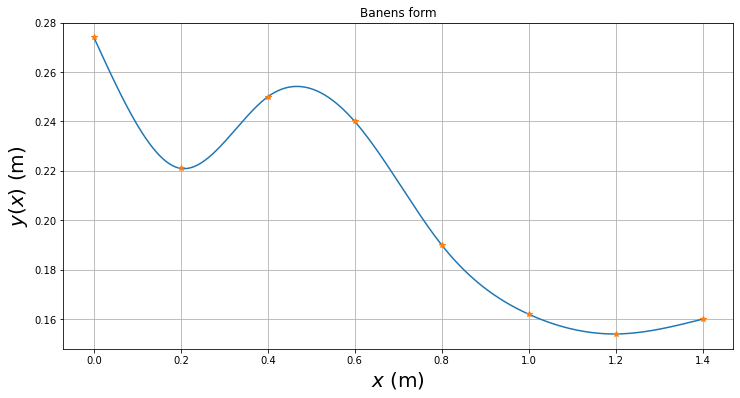

In [112]:
baneform = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, y, xfast, yfast, '*')
plt.title('Banens form')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$y(x)$ (m)', fontsize=20)
plt.grid()
plt.show()

In [113]:
g = 9.81
# treghetsmomentet
c = 2/5
M = 0.031
R = 0.011
I = c*M*R**2

file = 'lab_data.txt'
f = open(file, 'r')
data_list = f.readlines()
time_data, x_data, y_data, v_data, ek_data = [],[],[],[],[]

for i in range(2,len(data_list)):
    data_list[i] = data_list[i].replace(',','.')
    data = data_list[i].strip('\n').split('\t')
    time_data.append(float(data[0]))
    x_data.append(float(data[1]))
    y_data.append(float(data[2]))
    v_data.append(float(data[3]))
    omega = float(data[3])/R
    e_kinetic = (1/2)*M*(float(data[3])**2)
    e_rotation = (1/2)*I*(omega**2)
    ek_data.append(e_kinetic+e_rotation)

In [114]:
# fart
def v():
    return np.sqrt((2*g*(y[0]-y)/(1+c)))

$$ v = \sqrt{2g(y_0 - y) \over (1+c)} $$

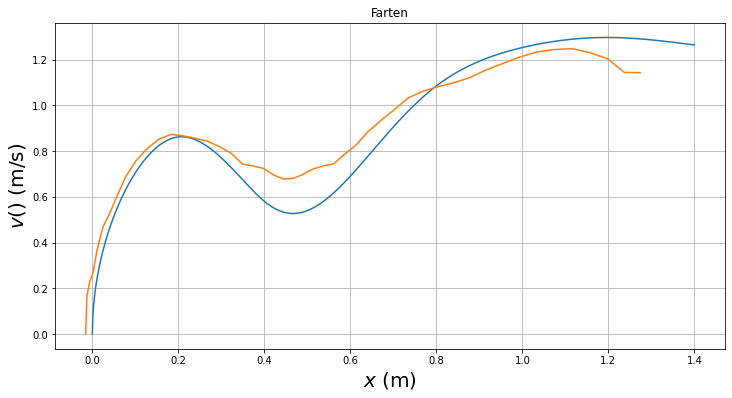

In [115]:
fart = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, v())
plt.plot(x_data,v_data)
plt.title('Farten')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v()$ (m/s)', fontsize=20)
plt.grid()
plt.show()

In [116]:
# hellningsvinkel
def betha():
    return np.arctan(dy)

$$ \beta = \arctan{y'} $$

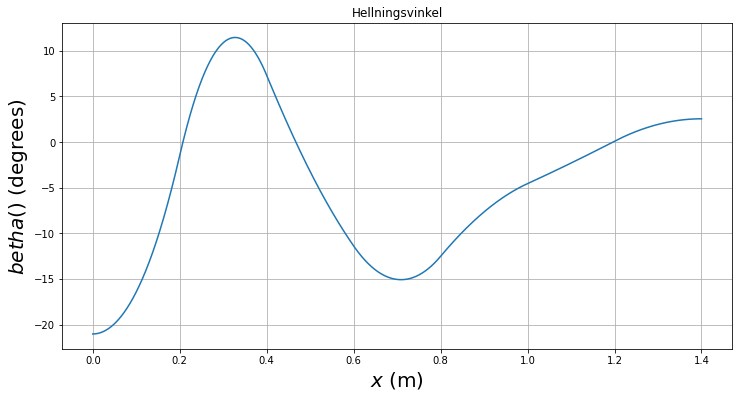

In [117]:
beta = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, betha()*180/np.pi)
plt.title('Hellningsvinkel')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$betha()$ (degrees)', fontsize=20)
plt.grid()
plt.show()

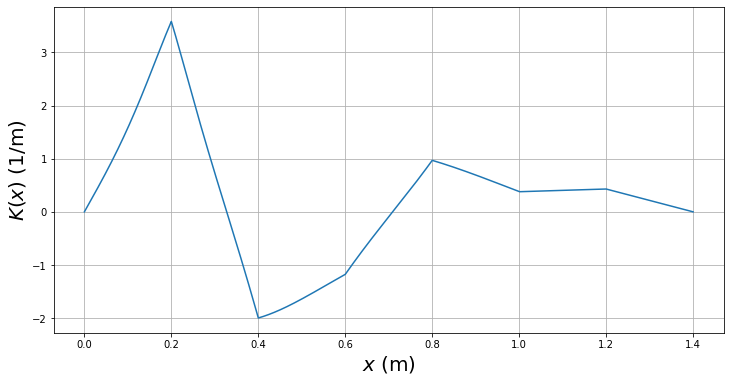

In [118]:
# sentripetalakselerasjon
def a():
    return v()**2 * k()

def k():
    return d2y/(1+dy*dy)**(3/2)

# normalkraft
def N():
    return M*(g*np.cos(betha())+a())

K = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, k())
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$K(x)$ (1/m)', fontsize=20)
plt.grid()
plt.show()

$$ a = v^2 * k $$


$$ κ = {y′′ \over (1+y′^2)^{3/2}} $$

$$ N = M(g cos β + a⊥) $$

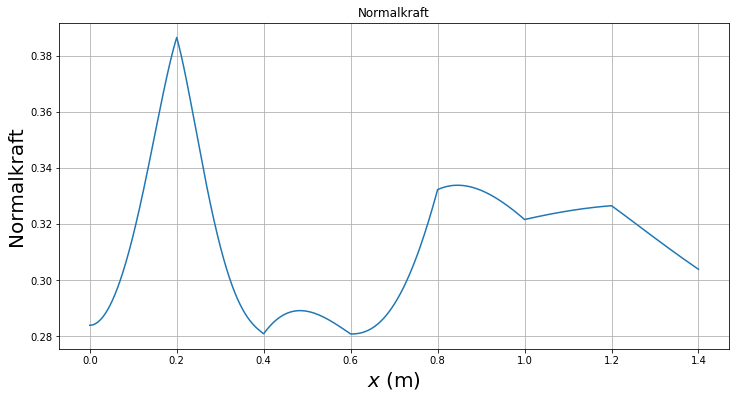

In [119]:
normalkraft = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, N())
plt.title('Normalkraft')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('Normalkraft', fontsize=20)
plt.grid()
plt.show()

In [120]:
# friksjon
def friksjon():
    return (c*M*g*np.sin(betha()))/(1+c)

$$ f = {cMg sin β \over {1 + c}} $$ 

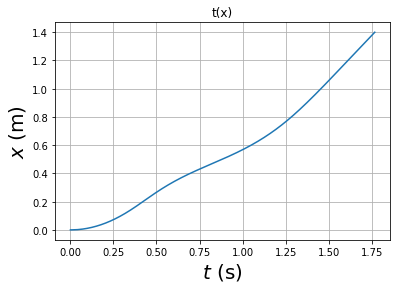

In [121]:
def v_xn():
    return v()*np.cos(betha())

def average_v_xn(n):
    return 1/2 * (v_xn()[n]+v_xn()[n-1])

def delta_tn(n):
    return dx/average_v_xn(n)

def t():
    sum = 0
    result = []
    for i in range(Nx):
        sum += delta_tn(i)
        result.append(sum)
    return result

plt.plot(t(), x)
plt.title('t(x)')
plt.ylabel('$x$ (m)', fontsize=20)
plt.xlabel('$t$ (s)', fontsize=20)
plt.grid()
plt.show()

$$ 〈vx_n〉 = {1 \over 2} * (v_x,_n -1 + v_x,_n) $$

$$ ∆t_n = {∆x_n \over〈vx_n〉} = {2∆x_n \over(v_x,_n-1 + v_x,_n)} $$

$$ ∆t_n = \displaystyle\sum_{j=1}^{n} ∆t_j $$

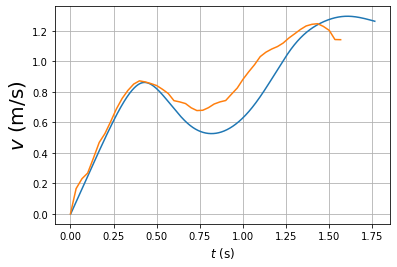

In [122]:
# Hastighet som funksjon av tiden
plt.plot(t(), v())
plt.plot(time_data,v_data)
plt.xlabel('$t$ (s)', fontsize=12)
plt.ylabel('$v$ (m/s)', fontsize=20)
plt.grid()
plt.show()

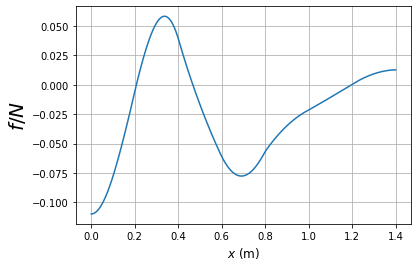

In [123]:
# Forholdet mellom friksjonskraften f og normalkraften N
plt.plot(x, friksjon()/N())
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$f/N$', fontsize=20)
plt.grid()
plt.show()

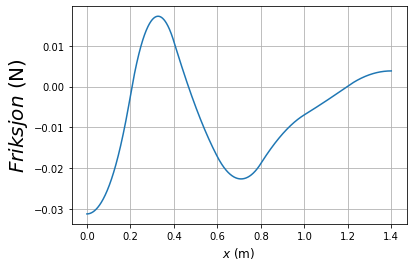

In [124]:
# Friksjonskraft graf
plt.plot(x, friksjon())
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$Friksjon$ (N)', fontsize=20)
plt.grid()

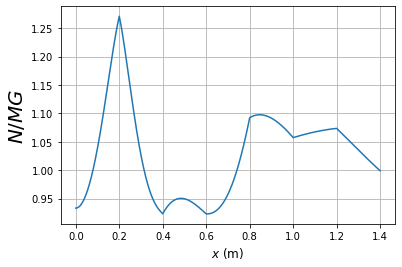

In [125]:
# N/Mg, normalkraft i forhold til G
plt.plot(x, N()/(M*g))
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$N/MG$', fontsize=20)
plt.grid()
plt.show()

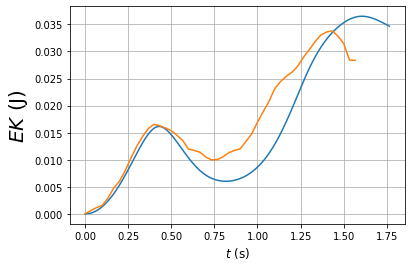

In [126]:
def kinetic_energy():
    return 1/2 * M * v()**2 + 1/2 * I * (v()/R)**2

plt.plot(t(), kinetic_energy())
plt.plot(time_data, ek_data)
plt.xlabel('$t$ (s)', fontsize=12)
plt.ylabel('$EK$ (J)', fontsize=20)
plt.grid()
plt.show()

